# **Essentials Libraries**

**Importing necessary libraries**
*  **pandas:** Manipulate and analyze data tables.
*  **re (regular expressions):** Search and manipulate strings using patterns.
*  **unicodedata:** Normalize and process Unicode text.
*  **transformers (AutoTokenizer):** Tokenize text using pre-trained NLP models.
*  **imblearn.over_sampling (SMOTE):** Balance dataset by creating synthetic samples of the minority class.
*  **imblearn.under_sampling (RandomUnderSampler):** Reduce majority class to balance dataset.
*  **sklearn.model_selection (train_test_split):** Split dataset into training and testing sets.
*  **sklearn.feature_extraction.text (TfidfVectorizer):** Convert text to numerical features using TF-IDF.
*  **sklearn.linear_model (LogisticRegression):** Train a classification model using logistic regression.
*  **sklearn.metrics:** Evaluate model performance (accuracy, precision, recall, F1, confusion matrix, report).
*  **random:** Perform random operations like shuffling and sampling.
*  **matplotlib.pyplot:** Create visualizations and plots.
*  **seaborn:** Enhanced statistical data visualization based on matplotlib.
*  **joblib:** Save and load Python objects efficiently


In [1]:
import pandas as pd
import re
import unicodedata
from transformers import AutoTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import random
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

# **Mount from Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load the Dataset**

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Technohaven/Bangla-Text-Dataset-main/dataset.csv'
df = pd.read_csv(file_path)

# Display the dataset
print("First few rows of the dataset:")
df.head(10)

First few rows of the dataset:


,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
5,অন্যরকম .. ভালো লাগলো ..❤️,Singer,Male,1.0,not bully
6,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,Actor,Female,9.0,troll
7,মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...,Actor,Female,0.0,not bully
8,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,Actor,Female,4.0,religious
9,"হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।",Social,Male,0.0,not bully


# **Data Analysis**

**Print the shape of the dataset**

In [4]:
df.shape

(44001, 5)

**Calculate the percentage of Male and Female members and plot**

In [5]:
# Calculate the total number of entries
total_entries = len(df)

# Count the number of males and females
gender_counts = df['Gender'].value_counts()

# Calculate the percentage of each class
gender_percentages = (gender_counts / total_entries) * 100

# Print the results
for gender, percentage in gender_percentages.items():
    print(f"Percentage of gender '{gender}': {percentage:.2f}%")

print()

Percentage of gender 'Female': 68.07%
Percentage of gender 'Male': 31.93%



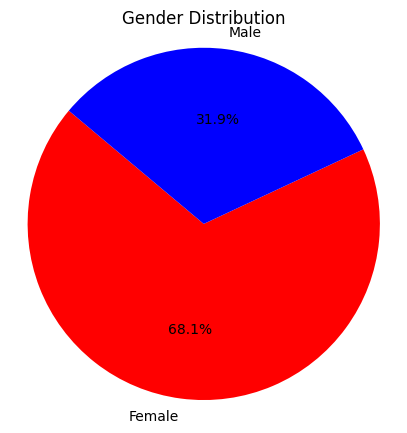

In [6]:
# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#ff0000','#0000ff'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Dataset Review:**
The dataset consists of social media comments written in Bangla, which serve as the input texts. Each comment represents an individual piece of text expressing opinions, reactions, or statements related to celebrities, politicians, athletes, or social issues.


**Comment:** The comment column holds the actual text from social media that will be analyzed or classified.

**Label:** The label column shows the category of each comment. such as:
*   sexual
*   not bully
*   troll
*   religious
*   threat

**label structure:**
The dataset uses a multiclass label structure because the comments are categorized into different types of bullying or sentiments. This means that each comment is labeled with one specific category, such as offensive language, hate speech, neutral, positive, or negative.

**Calculate the percentage of each classes and plot**

In [7]:
# Get distinct classes in the label
distinct_classes = df['label'].nunique()

# Print result
print(f"Number of classes: {distinct_classes}")

# Count of each distinct class
class_counts = df['label'].value_counts()

# Calculate the percentage of each class
class_percentages = (class_counts / total_entries) * 100

# Print results
for label, percentage in class_percentages.items():
    print(f"Percentage of class '{label}': {percentage:.2f}%")

print()

Number of classes: 5
Percentage of class 'not bully': 34.86%
Percentage of class 'troll': 23.78%
Percentage of class 'sexual': 20.29%
Percentage of class 'religious': 17.22%
Percentage of class 'threat': 3.85%



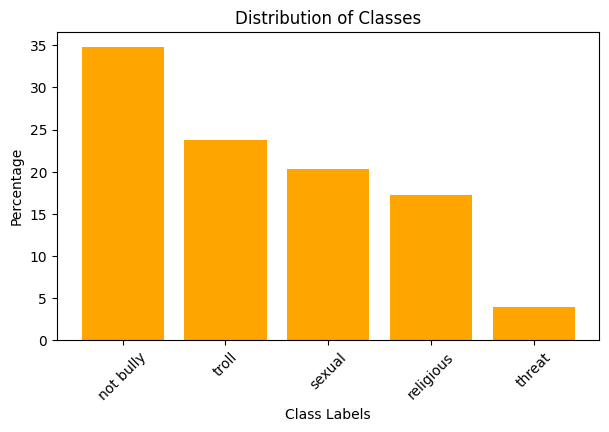

In [8]:
# Plot the histogram
plt.figure(figsize=(7,4))
plt.bar(class_percentages.index, class_percentages, color='orange')
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

**Normalization**

**Remove: Digits, Punctuations, Web Links, Non-Bengali Letters and Emoji's**

In [9]:
def normalize_bangla_text(text):
    text = str(text)

    # Remove Links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and symbols
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)

    # Remove Non-Bengali letters
    text = re.sub(r'[a-zA-Z]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [10]:
df['comment_normalized'] = df['comment'].apply(normalize_bangla_text)

**Test Normalized Data**

In [11]:
for i, row in df[['comment', 'comment_normalized']].head(10).iterrows():
    print(f"Original: {row['comment']}")
    print(f"Normalized: {row['comment_normalized']}")
    print("-" * 50)

Original: ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় এখন ম*** চ**** সময় safa কে একটু চুদাম যার ইচ্ছা আছে চুদার লাইনে দারা একজন একজন করে জাবি
Normalized: ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় এখন ম চ সময় কে একটু চুদাম যার ইচ্ছা আছে চুদার লাইনে দারা একজন একজন করে জাবি
--------------------------------------------------
Original: ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছিলেন?
Normalized: ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
--------------------------------------------------
Original: অরে বাবা, এই টা কোন পাগল????
Normalized: অরে বাবা এই টা কোন পাগল
--------------------------------------------------
Original: ক্যাপ্টেন অফ বাংলাদেশ
Normalized: ক্যাপ্টেন অফ বাংলাদেশ
--------------------------------------------------
Original: পটকা মাছ
Normalized: পটকা মাছ
--------------------------------------------------
Original: অন্যরকম .. ভালো লাগলো ..❤️
Normalized: অন্যরকম ভালো লাগলো
------------------------

**Remove Stopwords**

Here, I have used a Bangla Stopword Dataset for better Preprocessing. I have attatched the dataset in the data folder of my project.

In [12]:
# Load Bangla stopwords
stopwords_df = pd.read_excel('/content/drive/MyDrive/Technohaven/Bangla-Text-Dataset-main/Stopwords.xlsx')
stopwords_list = stopwords_df.iloc[:, 0].astype(str).tolist()

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_list]
    return ' '.join(filtered_words)

In [13]:
df['comment_no_stopwords'] = df['comment_normalized'].apply(remove_stopwords)

**Test Normalized Data**

In [14]:
for i, row in df[['comment_normalized', 'comment_no_stopwords']].head(5).iterrows():
    print(f"Normalized: {row['comment_normalized']}")
    print(f"Without Stopwords: {row['comment_no_stopwords']}")
    print("-" * 50)

Normalized: ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় এখন ম চ সময় কে একটু চুদাম যার ইচ্ছা আছে চুদার লাইনে দারা একজন একজন করে জাবি
Without Stopwords: হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় ম চ সময় একটু চুদাম ইচ্ছা চুদার লাইনে দারা একজন একজন জাবি
--------------------------------------------------
Normalized: ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন
Without Stopwords: ঘরে শুট কেমন লেগেছে ক্যামেরাতে
--------------------------------------------------
Normalized: অরে বাবা এই টা কোন পাগল
Without Stopwords: অরে বাবা টা পাগল
--------------------------------------------------
Normalized: ক্যাপ্টেন অফ বাংলাদেশ
Without Stopwords: ক্যাপ্টেন অফ বাংলাদেশ
--------------------------------------------------
Normalized: পটকা মাছ
Without Stopwords: পটকা মাছ
--------------------------------------------------


**Unicode Normalization**

In [15]:
def unicode_normalize(text):
    return unicodedata.normalize('NFC', text)

In [16]:
df['comment_unicode_normalized'] = df['comment_no_stopwords'].apply(unicode_normalize)

**Spell Correction**

I skipped this stage because after applying SpellChecker it decreases my models accuracy.

In [17]:
'''
from spellchecker import SpellChecker

spell = SpellChecker(language=None)  # None because Bangla is unsupported by default
# Load Bangla dictionary words from your stopwords or custom word list
spell.word_frequency.load_words(stopwords_list)

def bangla_spell_correct(text):
    corrected_words = []
    for word in text.split():
        corrected_word = spell.correction(word)
        corrected_words.append(corrected_word if corrected_word else word)
    return ' '.join(corrected_words)

# Apply spell correction (optional, experimental)
df['comment_spell_corrected'] = df['comment_unicode_normalized'].apply(bangla_spell_correct)

'''

"\nfrom spellchecker import SpellChecker\n\nspell = SpellChecker(language=None)  # None because Bangla is unsupported by default\n# Load Bangla dictionary words from your stopwords or custom word list\nspell.word_frequency.load_words(stopwords_list)\n\ndef bangla_spell_correct(text):\n    corrected_words = []\n    for word in text.split():\n        corrected_word = spell.correction(word)\n        corrected_words.append(corrected_word if corrected_word else word)\n    return ' '.join(corrected_words)\n\n# Apply spell correction (optional, experimental)\ndf['comment_spell_corrected'] = df['comment_unicode_normalized'].apply(bangla_spell_correct)\n\n"

**Save the Final Preprocessed data**

In [18]:
# Save the preprocessed DataFrame to CSV
output_file = '/content/drive/MyDrive/Technohaven/Bangla-Text-Dataset-main/preprocessed_dataset.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"Preprocessed data saved to {output_file}")

Preprocessed data saved to /content/drive/MyDrive/Technohaven/Bangla-Text-Dataset-main/preprocessed_dataset.csv


# **Tokenization**

**Tokenize Using Bangla-Bert:**

In [19]:
# Load Bangla-BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

sample_text = df.loc[0, 'comment_unicode_normalized']

tokens = tokenizer.tokenize(sample_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Original Text:\n", sample_text)
print("\nTokens:\n", tokens)
print("\nToken IDs:\n", token_ids)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

Original Text:
 হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় ম চ সময় একটু চুদাম ইচ্ছা চুদার লাইনে দারা একজন একজন জাবি

Tokens:
 ['হালা', '##র', 'পত', 'মদ', 'খাও', '##যার', 'সময', 'রাতের', 'বেলা', 'মদ', 'খাই', 'দিনের', 'বেলা', '##ও', 'মাঝে', '##মধ', '##যে', 'খা', '##য', 'ম', 'চ', 'সময', 'একট', 'চ', '##দাম', 'ইচ', '##ছা', 'চ', '##দার', 'লাইনে', 'দারা', 'একজন', 'একজন', 'জাবি']

Token IDs:
 [68013, 2046, 55923, 5589, 31331, 14979, 94306, 5226, 2918, 5589, 11978, 2522, 2918, 2058, 3025, 97718, 8844, 18362, 9294, 3110, 10273, 94306, 50364, 10273, 19251, 67305, 14380, 10273, 7538, 8710, 22055, 2141, 2141, 34904]


**Test Tokenized Data**

In [20]:
for i in range(10):
    text = df.loc[i, 'comment_unicode_normalized']
    tokens = tokenizer.tokenize(text)
    print(f"Comment {i+1} Original Text:\n{text}\n")
    print(f"Tokens:\n{tokens}\n")
    print("-" * 50)

Comment 1 Original Text:
হালার পুত মদ খাওয়ার সময় রাতের বেলা মদ খাই দিনের বেলাও মাঝেমধ্যে খায় ম চ সময় একটু চুদাম ইচ্ছা চুদার লাইনে দারা একজন একজন জাবি

Tokens:
['হালা', '##র', 'পত', 'মদ', 'খাও', '##যার', 'সময', 'রাতের', 'বেলা', 'মদ', 'খাই', 'দিনের', 'বেলা', '##ও', 'মাঝে', '##মধ', '##যে', 'খা', '##য', 'ম', 'চ', 'সময', 'একট', 'চ', '##দাম', 'ইচ', '##ছা', 'চ', '##দার', 'লাইনে', 'দারা', 'একজন', 'একজন', 'জাবি']

--------------------------------------------------
Comment 2 Original Text:
ঘরে শুট কেমন লেগেছে ক্যামেরাতে

Tokens:
['ঘরে', 'শট', 'কেমন', 'লেগেছে', 'ক', '##যাম', '##েরা', '##তে']

--------------------------------------------------
Comment 3 Original Text:
অরে বাবা টা পাগল

Tokens:
['অর', '##ে', 'বাবা', 'টা', 'পাগল']

--------------------------------------------------
Comment 4 Original Text:
ক্যাপ্টেন অফ বাংলাদেশ

Tokens:
['ক', '##যা', '##পটে', '##ন', 'অফ', 'বাংলাদেশ']

--------------------------------------------------
Comment 5 Original Text:
পটকা মাছ

Tokens:
['পটকা', 'মাছ']

-

**Encode to Binary**

In [21]:
# Define bullying labels
bullying_labels = ['threat', 'religious', 'bully', 'troll']

df['binary_label'] = df['label'].apply(lambda x: 1 if x in bullying_labels else 0)

# Check label counts
print(df['binary_label'].value_counts())

print(df[['label', 'binary_label']].head(10))

binary_label
0    24268
1    19733
Name: count, dtype: int64
       label  binary_label
0     sexual             0
1  not bully             0
2  not bully             0
3  not bully             0
4      troll             1
5  not bully             0
6      troll             1
7  not bully             0
8  religious             1
9  not bully             0


1.   Positive class (1) = threat, religious, bully, troll
2.   Negative class (0) = not bully

**After Binarization**

<ipython-input-22-6a6634380cd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='binary_label', palette='Set2')


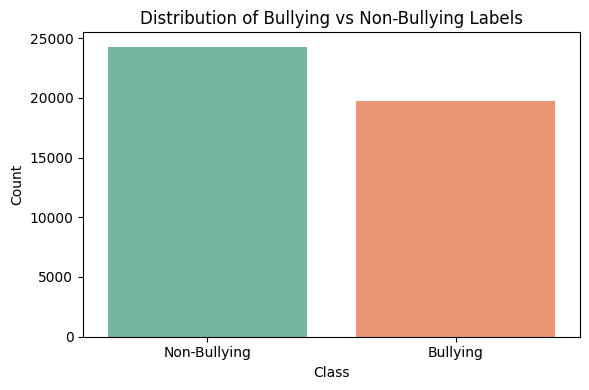

In [22]:
# Count plot for binary_label
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='binary_label', palette='Set2')

# Set axis labels and title
plt.xticks([0, 1], ['Non-Bullying', 'Bullying'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Bullying vs Non-Bullying Labels')

# Display the plot
plt.tight_layout()
plt.show()

**Encode to Multiclass**

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

df['multiclass_label'] = le.fit_transform(df['label'])

# Check the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label to ID mapping:")
print(label_mapping)

print(df[['label', 'multiclass_label']].head(20))

Label to ID mapping:
{'not bully': np.int64(0), 'religious': np.int64(1), 'sexual': np.int64(2), 'threat': np.int64(3), 'troll': np.int64(4)}
        label  multiclass_label
0      sexual                 2
1   not bully                 0
2   not bully                 0
3   not bully                 0
4       troll                 4
5   not bully                 0
6       troll                 4
7   not bully                 0
8   religious                 1
9   not bully                 0
10  religious                 1
11  religious                 1
12  not bully                 0
13  not bully                 0
14  not bully                 0
15     sexual                 2
16     sexual                 2
17  not bully                 0
18      troll                 4
19     sexual                 2


**After Multi-Class Classification**

<ipython-input-24-fddda02c4bf9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='multiclass_label', palette='Set3')


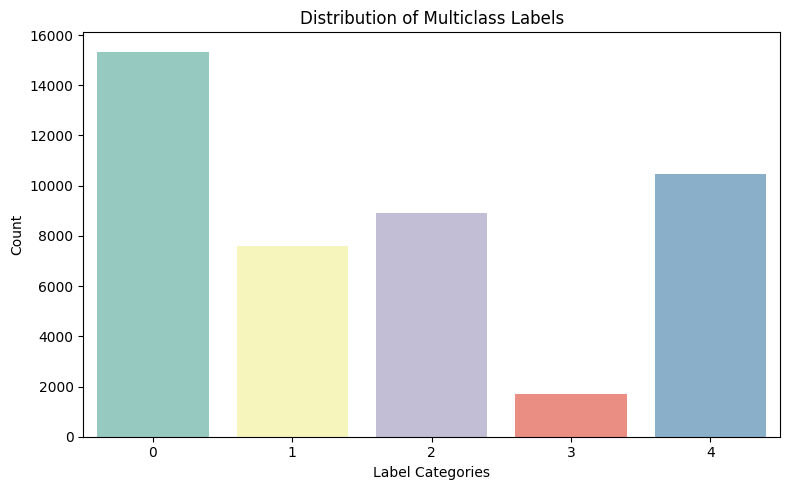

In [24]:
# Set figure size
plt.figure(figsize=(8, 5))

# Count plot for multiclass labels
sns.countplot(data=df, x='multiclass_label', palette='Set3')

# Add labels and title
plt.xlabel('Label Categories')
plt.ylabel('Count')
plt.title('Distribution of Multiclass Labels')

# Display plot
plt.tight_layout()
plt.show()



---



***Note: Although I encode the labels for both binary and multiclass classification, I focus only on the binary labels for feature extraction.***



---



**Data Imbalance Problem Solve**

In [25]:
!pip install imbalanced-learn

In [26]:
# Vectorize normalized text into TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(df['comment_unicode_normalized'])

y = df['binary_label']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: binary_label
0    19414
1    15786
Name: count, dtype: int64
After SMOTE: binary_label
0    19414
1    19414
Name: count, dtype: int64


In [27]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_vectorized, y)

print("After undersampling:", y_res.value_counts())

After undersampling: binary_label
0    19733
1    19733
Name: count, dtype: int64


**Visualization**

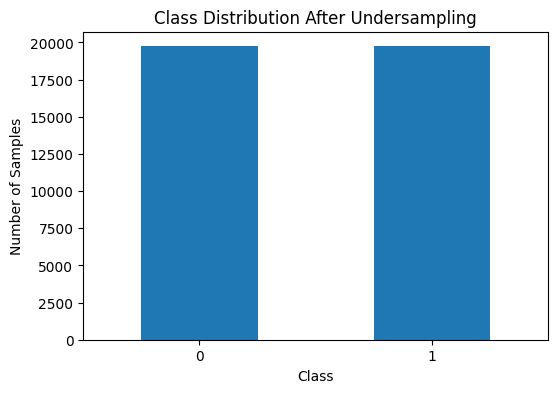

In [28]:
# Count the classes after undersampling
class_counts = y_res.value_counts()

# Plot
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

# **Bangla-BERT**

**Bangla-BERT Model**

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import re
import unicodedata

In [32]:
comments = df['comment_unicode_normalized'].tolist()
labels = df['binary_label'].tolist()

# Define class
class BanglaDataset(Dataset):
    def __init__(self, comments, labels, tokenizer, max_length=128):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, idx):
        comment = self.comments[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            comment,
            max_length=self.max_length,
            add_special_tokens=True,
            padding='max_length',
            return_attention_mask=True,
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and dataset
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
dataset = BanglaDataset(comments, labels, tokenizer, max_length=128)


train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load model and prepare optimizer, scheduler, loss
model = AutoModelForSequenceClassification.from_pretrained('sagorsarker/bangla-bert-base', num_labels=2)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 4

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = torch.nn.CrossEntropyLoss().to(device)

# Training and evaluation functions
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    accuracy = correct_predictions.double() / len(data_loader.dataset)
    return accuracy.item(), np.mean(losses)

def eval_model(model, data_loader, loss_fn, device):
    model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, labels)

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    accuracy = correct_predictions.double() / len(data_loader.dataset)
    return accuracy.item(), np.mean(losses)

# Training loop
EPOCHS = 4

for epoch in range(EPOCHS):
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device, scheduler)
    val_acc, val_loss = eval_model(model, val_loader, loss_fn, device)

    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

# Final test evaluation
test_acc, test_loss = eval_model(model, test_loader, loss_fn, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Save the fine-tuned model and tokenizer
model.save_pretrained('./models/bangla_bert_finetuned')
tokenizer.save_pretrained('./models/bangla_bert_finetuned')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
Train Loss: 0.3721, Train Accuracy: 0.8357
Val Loss: 0.3273, Val Accuracy: 0.8693
Epoch 2/4
Train Loss: 0.2574, Train Accuracy: 0.9015
Val Loss: 0.3281, Val Accuracy: 0.8718
Epoch 3/4
Train Loss: 0.1929, Train Accuracy: 0.9366
Val Loss: 0.4522, Val Accuracy: 0.8784
Epoch 4/4
Train Loss: 0.1369, Train Accuracy: 0.9603
Val Loss: 0.5614, Val Accuracy: 0.8705
Test Loss: 0.5306, Test Accuracy: 0.8778


('./models/bangla_bert_finetuned/tokenizer_config.json',
 './models/bangla_bert_finetuned/special_tokens_map.json',
 './models/bangla_bert_finetuned/vocab.txt',
 './models/bangla_bert_finetuned/added_tokens.json',
 './models/bangla_bert_finetuned/tokenizer.json')

**Print Evaluation Matrix**

In [34]:
def evaluate_performance(model, data_loader, device):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
    cm = confusion_matrix(all_labels, all_preds)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    return accuracy, precision, recall, f1, cm

# Usage example:
evaluate_performance(model, test_loader, device)

Accuracy:  0.8778
Precision: 0.8737
Recall:    0.8535
F1-score:  0.8635
Confusion Matrix:
[[2162  246]
 [ 292 1701]]


(0.8777550556691661,
 0.8736517719568567,
 0.8534872052182639,
 0.8634517766497461,
 array([[2162,  246],
        [ 292, 1701]]))

**Test**

In [38]:
def preprocess_text(text):
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and symbols
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)
    # Remove English letters
    text = re.sub(r'[a-zA-Z]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Unicode normalize
    text = unicodedata.normalize('NFC', text)

    return text

def predict_bullying(text, model, tokenizer, device, max_length=128):
    model.eval()
    text = preprocess_text(text)
    encoding = tokenizer.encode_plus(
        text,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).cpu().item()

    return "Bullying" if predicted_class == 1 else "Non-Bullying"

# Example usage:
user_input = input("Enter a Bangla comment: ")
result = predict_bullying(user_input, model, tokenizer, device)
print(f"Prediction: {result}")

Enter a Bangla comment: বালের তামাশা শুরু করছস
Prediction: Bullying


# **Convert to ONNX**

In [39]:
!pip install skl2onnx onnxruntime

INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00


In [40]:
pip uninstall onnx skl2onnx -y

Found existing installation: onnx 1.18.0
Uninstalling onnx-1.18.0:
  Successfully uninstalled onnx-1.18.0
Found existing installation: skl2onnx 1.18.0
Uninstalling skl2onnx-1.18.0:
  Successfully uninstalled skl2onnx-1.18.0


In [41]:
pip install onnx==1.14.1 skl2onnx==1.18.0

  Using cached skl2onnx-1.18.0-py2.py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 60.1 MB/s eta 0:00:00
Using cached skl2onnx-1.18.0-py2.py3-none-any.whl (300 kB)


In [44]:
model_cpu = model.to('cpu')
model_cpu.eval()

# Dummy inputs on CPU too
dummy_input_ids = torch.randint(0, tokenizer.vocab_size, (1, 128), dtype=torch.long)
dummy_attention_mask = torch.ones((1, 128), dtype=torch.long)

torch.onnx.export(
    model_cpu,
    (dummy_input_ids, dummy_attention_mask),
    "bangla_bert_finetuned.onnx",
    input_names=['input_ids', 'attention_mask'],
    output_names=['output'],
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_length'},
        'attention_mask': {0: 'batch_size', 1: 'sequence_length'},
        'output': {0: 'batch_size'}
    },
    opset_version=14,
    do_constant_folding=True
)